# IMPORT LIBRARY

In [1]:
import pandas as pd #Untuk memanipulasi data
import numpy as np #untuk operasi numerik
import matplotlib.pyplot as plt #untuk visualisasi

In [2]:
#Membaca data dari file CSV
data = pd.read_csv("obesity_data.csv") 
data #Menampilkan data

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight
...,...,...,...,...,...,...,...
494,57,Male,163.179656,72.580235,27.257520,4,Overweight
495,63,Male,158.255101,54.110311,21.605513,1,Normal weight
496,41,Female,154.635483,80.695918,33.746851,3,Obese
497,67,Male,158.093514,84.402078,33.769531,2,Obese


# MEMILIH DATA DARI DATASET UNTUK DIGUNAKAN SEBAGAI ATRIBUT X

In [3]:
#Mengambil hanya kolom "Age" dan "Weight" dari data
data = data[["Age", "Weight"]] #Age=x1; Weight=x2
data.head(10)#Menampilkan 10 baris pertama data

,Age,Weight
0,56,71.982051
1,69,89.959256
2,46,72.930629
3,32,84.886912
4,60,69.038945
5,25,61.145868
6,78,92.208521
7,38,59.359746
8,56,75.157672
9,75,81.533460


# MELIHAT RINGKASAN STATISTIK

In [4]:
#Menampilkan ringkasan statistik dari data
data.describe()

,Age,Weight
count,499.000000,499.000000
mean,49.881764,71.138526
std,18.229242,15.187480
min,18.000000,26.477145
25%,35.000000,60.041900
50%,50.000000,72.130231
75%,66.000000,81.292357
max,79.000000,118.819709


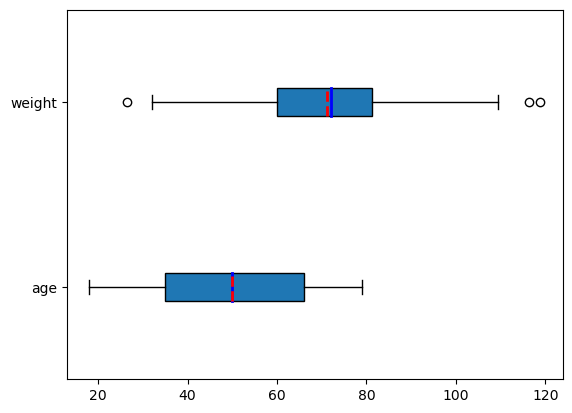

In [5]:
#Membuat subplot
fig, ax = plt.subplots()
#Membuat boxplot dengan menampilkan rata-rata, 
#garis median, dan warna yang ditentukan
ax.boxplot(data,
          vert = False,
          showmeans = True,
          meanline = True,
          labels = ("age", "weight"),
          patch_artist = True,
          medianprops = {"linewidth" : 2, "color" : "blue"},
          meanprops = {"linewidth" : 2, "color" : "red"})
# Menampilkan boxplot
plt.show()

# BUANG OUTLIER

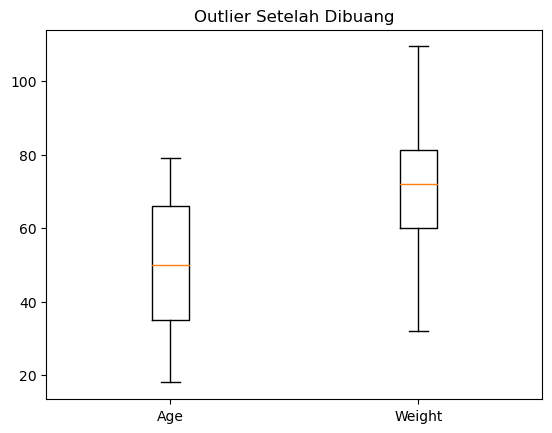

In [6]:
#Q1, Q3, dan IQR
kolom = ["Age", "Weight"]

Q1 = data[kolom].quantile(0.25)
Q3 = data[kolom].quantile(0.75)
IQR = Q3-Q1
#Menghitung kuartil pertama,kuartil ketiga,jangkauan antarkuartil
data = data[~((data[kolom]<(Q1 - 1.5 * IQR)) |
              (data[kolom]>(Q3 + 1.5 *IQR))).any(axis = 1)]
#Menghapus outlier dari data menggunakan metode IQR
plt.boxplot(data[kolom])
plt.xticks([1,2], kolom)
plt.title("Outlier Setelah Dibuang")
plt.show()
#Menampilkan boxplot setelah penghapusan outlier

In [7]:
#Menampilkan ringkasan statistik dari data 
#setelah penghapusan outlier
data.describe()

,Age,Weight
count,496.000000,496.000000
mean,49.943548,71.041371
std,18.236849,14.808913
min,18.000000,32.147688
25%,35.000000,60.094121
50%,50.000000,72.064545
75%,66.000000,81.192110
max,79.000000,109.493867


In [8]:
#Menampilkan informasi tentang dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496 entries, 0 to 498
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     496 non-null    int64  
 1   Weight  496 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.6 KB


# MEMBUAT NILAI X

In [9]:
#Mengonversi dataset menjadi array numpy
x_array = np.array(data)

# VISUALISASI PERSEBARAN DATA

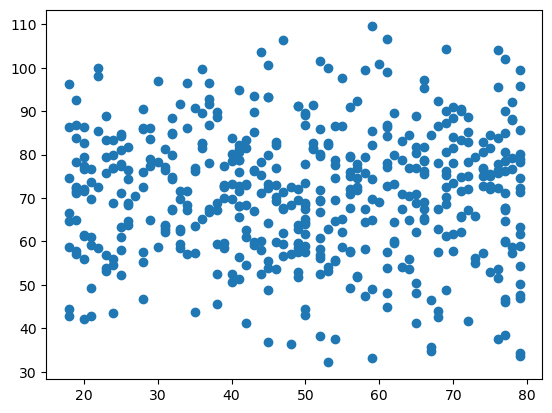

In [10]:
plt.scatter(data.Age, data.Weight)
plt.show()
#Menampilkan scatter plot dari data

# STANDARISASI

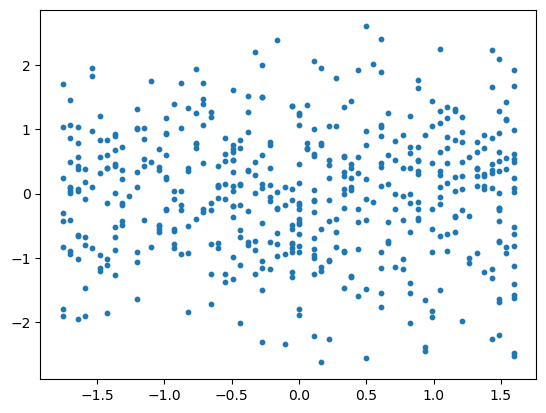

In [11]:
#Melakukan standarisasi fitur menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_array)
plt.scatter(x_scaled[:,0], x_scaled[:,1], s=10)
#Menampilkan scatter plot dari data yang telah distandarisasi
plt.show()

# CEK SUM OF SQUARE ERROR DARI TIAP PEMBAGIAN JUMLAH CLUSTER

In [12]:
from sklearn.cluster import KMeans
sse = []
index = range(1,10)
#Melakukan iterasi untuk nilai jumlah cluster tertentu 
#dalam KMeans clustering 
for i in index :
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init='auto')
    kmeans.fit(x_scaled)
    sse_ = kmeans.inertia_
    sse.append(sse_)
#Mencetak inertia (SSE) untuk setiap iterasi
    print(i,sse_)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


1 992.0
2 668.2231651638008


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


3 395.7506163947636
4 308.0690172734548


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


5 256.1886787036955
6 205.48614412443698


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


7 178.9089617743242
8 153.35361694356726
9 139.51201592967558


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


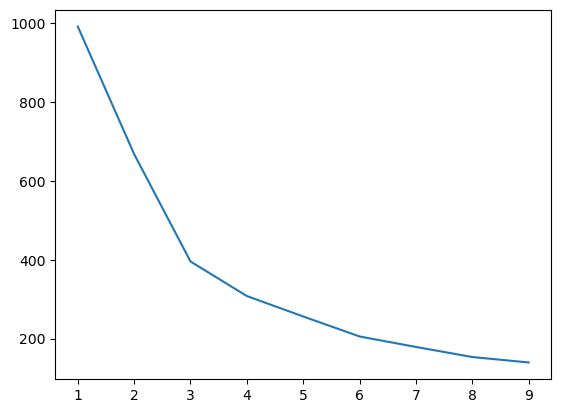

In [13]:
plt.plot(index, sse)
plt.show()
#Menampilkan plot SSE untuk memilih jumlah cluster yang tepat

# MEMBUAT MODEL

In [14]:
kmeans = KMeans (n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(x_scaled)
#Melakukan KMeans clustering dengan jumlah cluster 

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=0)

# MELIHAT CLUSTER PUSAT

In [15]:
kmeans.cluster_centers_
#Menampilkan pusat cluster

array([[ 0.4951428 , -1.05460564],
       [ 0.79831716,  0.77383602],
       [-1.02395553,  0.11486265]])

# VISUALISASI PERSEBARAN DATA SETELAH CLUSTERING

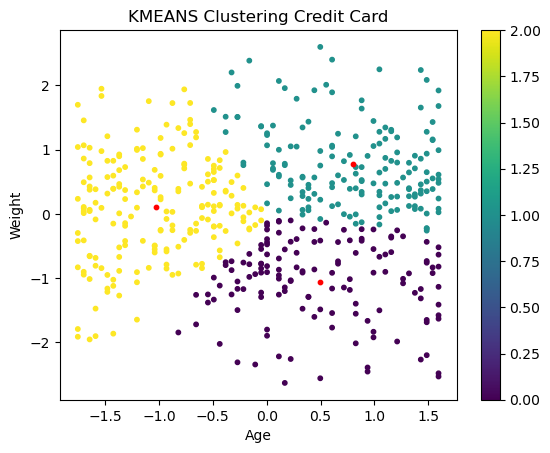

In [16]:
output = plt.scatter(x_scaled[:,0],x_scaled[:,1], s=10, c = kmeans.labels_) #DATANYA
# Menampilkan scatter plot hasil clustering dengan pusat cluster (centroid)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="red", s=10) #centroid
plt.title("KMEANS Clustering Credit Card")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.colorbar(output)
plt.show()
#menampilkan bar skala warna

# EVALUASI MODEL

In [17]:
from sklearn.metrics import davies_bouldin_score
labels = kmeans.labels_
davies_bouldin_score(x_scaled, labels)
#Menghitung nilai Davies-Bouldin untuk mengevaluasi kualitas clustering

0.8623069088302309